In [2]:
import os
import pandas as pd
import plotly.express as px

In [3]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data=pd.read_csv('/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv')
data

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [5]:
classes = {   'c0' : "safe_driving",
                      'c1' : "texting-right",
                      'c2' : "talking_on_the_phone-right",
                      'c3' : "texting-left",
                      'c4' : "talking_on_the_phone-left",
                      'c5' : "operating_the_radio",
                      'c6' : "drinking",
                      'c7' : "reaching_behind",
                      'c8' : "hair-and-makeup",
                      'c9' : "talking_to_passenger"}

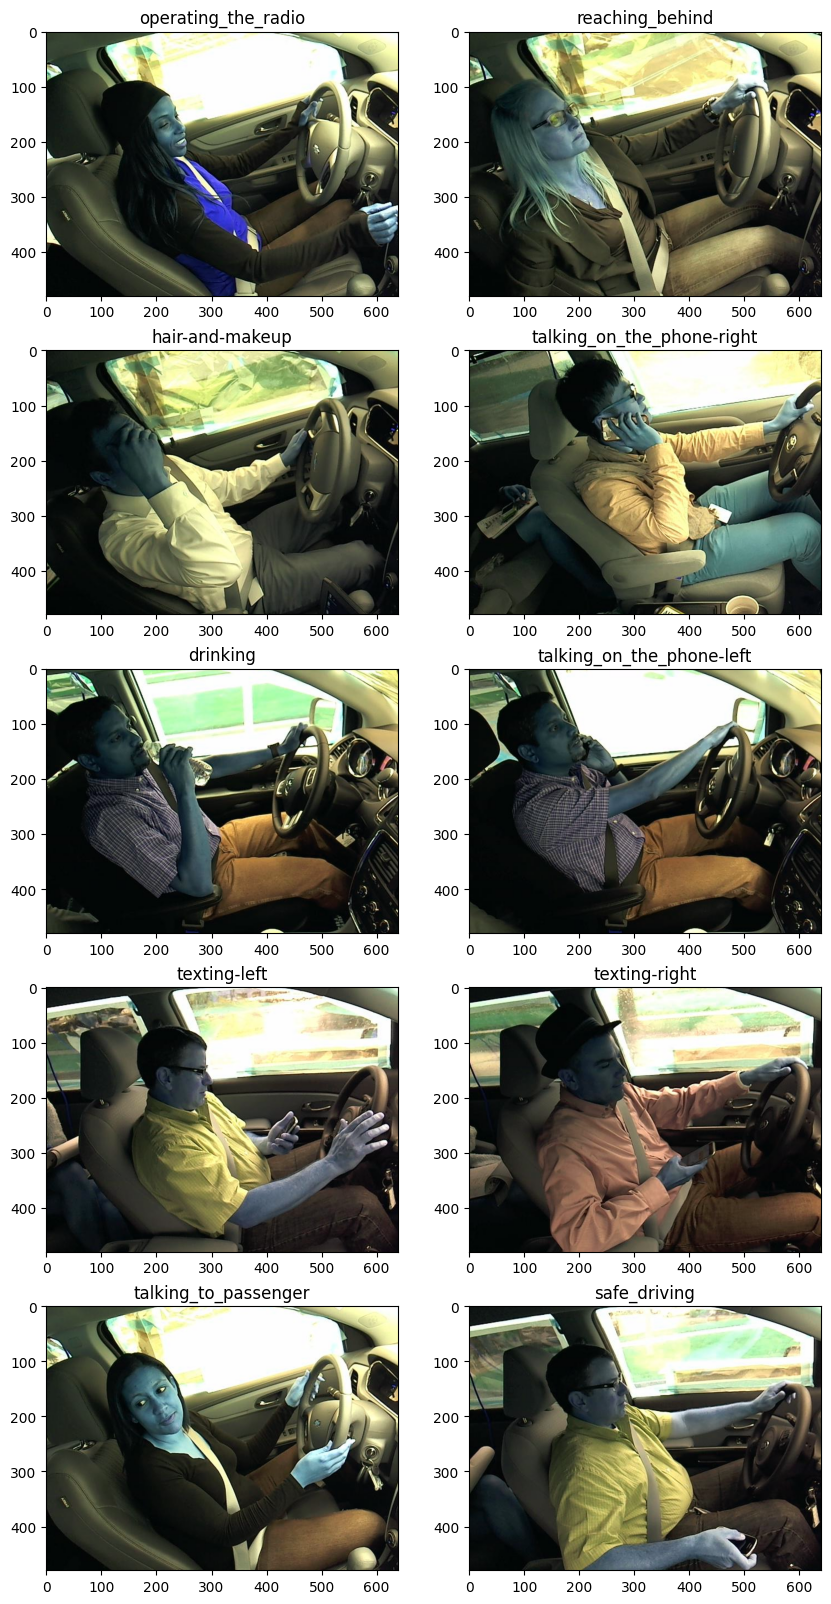

In [28]:
dir=('/kaggle/input/state-farm-distracted-driver-detection/imgs/train')
fig = plt.figure(figsize=(10, 20))
rows=5
columns=2
c=1
for directory in os.listdir(dir):
    for i, file in enumerate(os.listdir(dir+'/'+directory)):
        if(i==1):
            break
        else:
                
            img=cv2.imread(dir+'/'+directory+'/'+file)
            fig.add_subplot(rows, columns, c)
            c=c+1
            
            plt.imshow(img)
            plt.title(classes[directory])
            
            
    
        
        
            



### classes = {   'c0' : "safe_driving",
                      'c1' : "texting-right",
                      'c2' : "talking_on_the_phone-right",
                      'c3' : "texting-left",
                      'c4' : "talking_on_the_phone-left",
                      'c5' : "operating_the_radio",
                      'c6' : "drinking",
                      'c7' : "reaching_behind",
                      'c8' : "hair-and-makeup",
                 'c9' : "talking_to_passenger"}
class_counts = data['classname'].value_counts()
keys=classes.keys()

In [7]:
keys=classes.keys()

In [8]:
px.histogram(data , x="classname" ,  color="classname", title="Images By Categories ")

In [9]:
class_counts=data.classname.value_counts()


In [10]:

test_dir='/kaggle/input/state-farm-distracted-driver-detection/imgs/test'
len(os.listdir(test_dir))

79726

In [11]:
#made two directories for training and testing 
#each directory will contain folder naming 
os.mkdir('/kaggle/working/testing')
os.mkdir('/kaggle/working/training')

In [12]:
for each_class in keys:
    os.mkdir(os.path.join('/kaggle/working/training/', each_class))
    os.mkdir(os.path.join('/kaggle/working/testing',each_class))

In [13]:
import csv
my_dict={}

with open('/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv') as f:
    reader=csv.reader(f)
    next(reader)
    for row in reader:
        key = row[1].lower()
        if key in data:
            my_dict[key].append(row[2])
        else:
            my_dict[key] = [row[2]]


In [14]:
my_dict.keys()

dict_keys(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

In [15]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import Model 
from tensorflow.keras.layers import Input , GlobalAveragePooling2D , BatchNormalization , Dropout , Dense 

from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping 


In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)


In [17]:
test_datagen=ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

In [18]:
train_dir='/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
IMG_SIZE = (224 ,224)
BATCH_SIZE = 64
train_gen = ImageDataGenerator(width_shift_range = 0.3,
                               height_shift_range = 0.3,
                               shear_range = 0.3,
                               zoom_range = 0.4,
                               validation_split = 0.2)

test_gen = ImageDataGenerator()


In [19]:
train_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='training',
                                         seed = 42)
val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='validation',
                                         seed = 42)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [20]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [21]:
from keras.models import Sequential
demo_resnet_model = Sequential()
##import resnet50 model
pretrained_model_for_demo= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=5,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

demo_resnet_model.add(Dropout(0.2))
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(1024, activation='relu'))

demo_resnet_model.add(Dense(10, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [22]:
demo_resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 25,696,138
Trainable params: 2,108,426
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
test_dir='/kaggle/input/state-farm-distracted-driver-detection/imgs'


In [24]:
test_data = test_gen.flow_from_directory(test_dir ,
                                        target_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        classes = ['test'],
                                        shuffle = False)

Found 79726 images belonging to 1 classes.


In [25]:
demo_resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
es = EarlyStopping(monitor='val_acc', patience = 4, min_delta=0.01)

In [29]:
epochs=10
history = demo_resnet_model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/10
281/281 [==============================] - 343s 1s/step - loss: 0.7581 - accuracy: 0.7374 - val_loss: 0.5605 - val_accuracy: 0.8201
Epoch 2/10
281/281 [==============================] - 341s 1s/step - loss: 0.7191 - accuracy: 0.7519 - val_loss: 0.5104 - val_accuracy: 0.8349
Epoch 3/10
281/281 [==============================] - 336s 1s/step - loss: 0.6800 - accuracy: 0.7702 - val_loss: 0.4691 - val_accuracy: 0.8603
Epoch 4/10
281/281 [==============================] - 338s 1s/step - loss: 0.6574 - accuracy: 0.7788 - val_loss: 0.4658 - val_accuracy: 0.8482
Epoch 5/10
281/281 [==============================] - 337s 1s/step - loss: 0.6296 - accuracy: 0.7833 - val_loss: 0.4573 - val_accuracy: 0.8534
Epoch 6/10
281/281 [==============================] - 339s 1s/step - loss: 0.6244 - accuracy: 0.7862 - val_loss: 0.4533 - val_accuracy: 0.8543
Epoch 7/10
281/281 [==============================] - 337s 1s/step - loss: 0.5963 - accuracy: 0.7983 - val_loss: 0.4363 - val_accuracy: 0.8574

In [36]:
x=(demo_resnet_model.predict(test_data))

1246/1246 [==============================] - 358s 287ms/step


In [41]:
x

array([[2.08788679e-05, 9.54526769e-08, 1.95452481e-06, ...,
        3.01517900e-09, 6.84587391e-08, 1.08121458e-06],
       [6.23020008e-02, 2.63545935e-05, 3.00082989e-04, ...,
        3.90608056e-06, 3.30729783e-02, 3.52936350e-02],
       [7.80127704e-01, 1.62322875e-02, 1.12278725e-03, ...,
        2.26733671e-03, 5.60574047e-02, 1.43540651e-01],
       ...,
       [4.07291902e-03, 4.07403022e-01, 1.00558129e-04, ...,
        4.24924679e-03, 4.27596271e-02, 5.25471114e-04],
       [4.28952808e-06, 1.36595962e-04, 1.20468184e-01, ...,
        8.50912766e-05, 7.61190295e-01, 1.10061388e-04],
       [6.30600095e-01, 1.72270229e-03, 1.73295302e-05, ...,
        6.75970986e-02, 1.04026608e-01, 2.18245722e-02]], dtype=float32)